# Final Project Exploratory Data Analysis

Do your EDA in this notebook!

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Import data

Read in the data in data directory

In [2]:
fires = pd.read_csv('data/Fires_pruned.csv')

/home/tejasvi/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,11,12,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


checking the columns and data using head()

In [3]:
pd.set_option('display.max_columns', 45)
fires.head(3)

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,17,17,FS-1418878,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,109,23,NaN,POWER,CA-ENF-017646,POWER,CA3850212028020041006,POWER,NaN,2004,2453284.5,280,1415.0,2.0,Equipment Use,2453299.5,295.0,1000.0,16823.0,G,38.523333,-120.211667,5.0,USFS,CA,5,5.0,Amador,NaN
1,18,18,FS-1418881,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,111,35,BHA3,FREDS,CA-ENF-18044,FREDS,CA3878712031820041013,FREDS,NaN,2004,2453291.5,287,1618.0,2.0,Equipment Use,2453295.5,291.0,1800.0,7700.0,G,38.780000,-120.260000,5.0,USFS,CA,17,17.0,El Dorado,NaN
2,26,26,FS-1418897,FED,FS-FIRESTAT,FS,USNMLNF,Lincoln National Forest,0308,Lincoln National Forest,22,NM-LNF-022,AVP4,BACHELOR,NaN,NaN,NaN,NaN,NaN,2004,2453206.5,202,1405.0,1.0,Lightning,2453206.5,202.0,1600.0,10.0,C,33.315833,-105.512222,5.0,USFS,NM,27,27.0,Lincoln,NaN


checking the number of rows and columns in the dataset.

In [4]:
fires.shape

(274170, 39)

datatypes of the columns in dataset

In [5]:
fires.dtypes

OBJECTID                        int64
FOD_ID                          int64
FPA_ID                         object
SOURCE_SYSTEM_TYPE             object
SOURCE_SYSTEM                  object
NWCG_REPORTING_AGENCY          object
NWCG_REPORTING_UNIT_ID         object
NWCG_REPORTING_UNIT_NAME       object
SOURCE_REPORTING_UNIT          object
SOURCE_REPORTING_UNIT_NAME     object
LOCAL_FIRE_REPORT_ID           object
LOCAL_INCIDENT_ID              object
FIRE_CODE                      object
FIRE_NAME                      object
ICS_209_INCIDENT_NUMBER        object
ICS_209_NAME                   object
MTBS_ID                        object
MTBS_FIRE_NAME                 object
COMPLEX_NAME                   object
FIRE_YEAR                       int64
DISCOVERY_DATE                float64
DISCOVERY_DOY                   int64
DISCOVERY_TIME                float64
STAT_CAUSE_CODE               float64
STAT_CAUSE_DESCR               object
CONT_DATE                     float64
CONT_DOY    

finding the null values

In [6]:
fires.isnull().sum()

OBJECTID                           0
FOD_ID                             0
FPA_ID                             0
SOURCE_SYSTEM_TYPE                 0
SOURCE_SYSTEM                      0
NWCG_REPORTING_AGENCY              0
NWCG_REPORTING_UNIT_ID             0
NWCG_REPORTING_UNIT_NAME           0
SOURCE_REPORTING_UNIT              0
SOURCE_REPORTING_UNIT_NAME         0
LOCAL_FIRE_REPORT_ID          222615
LOCAL_INCIDENT_ID             127877
FIRE_CODE                     226472
FIRE_NAME                     145509
ICS_209_INCIDENT_NUMBER       251921
ICS_209_NAME                  251921
MTBS_ID                       263183
MTBS_FIRE_NAME                263183
COMPLEX_NAME                  270937
FIRE_YEAR                          0
DISCOVERY_DATE                     0
DISCOVERY_DOY                      0
DISCOVERY_TIME                129979
STAT_CAUSE_CODE                    0
STAT_CAUSE_DESCR                   0
CONT_DATE                     136793
CONT_DOY                      136793
C

Working on first inspiration:
Did number of wildfires per year increased over period of time?

So we need mainly fire year column and we need to count the number of fires per year. Also lets sort it.

In [7]:
total_fires_per_year = fires['FIRE_YEAR'].value_counts()
total_fires_per_year.sort_index()

1992     9454
1993     9025
1994    11232
1995    10695
1996    12608
1997     7840
1998     9497
1999    13982
2000    15240
2001    11109
2002     9852
2003     8186
2004     9124
2005    14053
2006    20540
2007    13483
2008    13489
2009    11633
2010    11398
2011    15352
2012    10443
2013     7152
2014     8769
2015    10014
Name: FIRE_YEAR, dtype: int64

ploting this data 

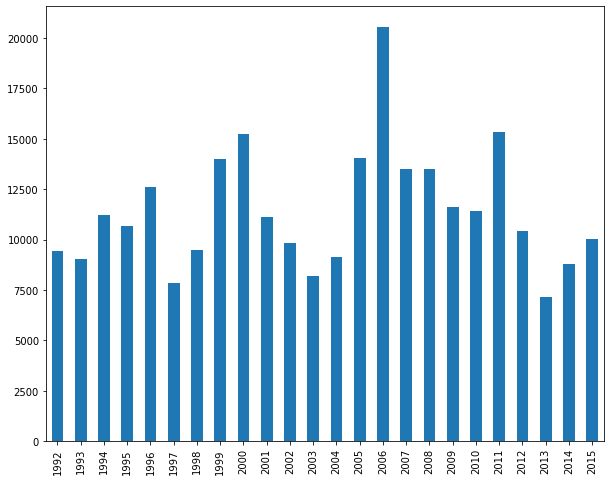

In [8]:
total_fires_per_year.sort_index().plot(kind = 'bar', figsize = (10, 8));

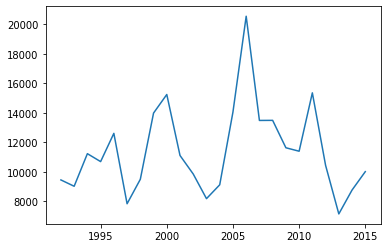

In [9]:
total_fires_per_year.sort_index().plot();

Now trying to find out average distruction caused per year. So we have FIRE_SIZE column telling the size of fire in acres.


In [10]:
fires[['FIRE_YEAR', 'FIRE_SIZE']].groupby('FIRE_YEAR').sum()

,FIRE_SIZE
FIRE_YEAR,
1992,2.123900e+06
1993,2.118394e+06
1994,4.033880e+06
1995,1.964751e+06
1996,5.916986e+06
1997,3.142108e+06
1998,1.929160e+06
1999,5.965879e+06
2000,7.524695e+06


In [11]:
avgfiresize_peryear = fires[['FIRE_YEAR', 'FIRE_SIZE']].groupby('FIRE_YEAR').mean()
avgfiresize_peryear

,FIRE_SIZE
FIRE_YEAR,
1992,224.656221
1993,234.725108
1994,359.141743
1995,183.707429
1996,469.304078
1997,400.779065
1998,203.133587
1999,426.682826
2000,493.746423


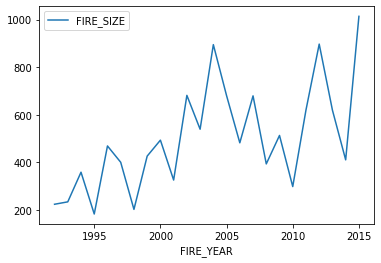

In [12]:
avgfiresize_peryear.plot();

Over the period of time the average area of distruction due to wildfire has increaded.


lets group-by fires based on fire size class where 
C=10.0-99.9 acres, 
D=100-299 acres, 
E=300 to 999 acres, 
F=1000 to 4999 acres, and 
G=5000+ acres)

In [13]:
# fires_grouped_by_Fireclass = fires.groupby('FIRE_SIZE_CLASS').size().reset_index().rename(columns={0:'NUMBER_OF_FIRES'})
# fires_grouped_by_Fireclass.set_index(fires_grouped_by_Fireclass['FIRE_SIZE_CLASS'], inplace=True)
# # fires_grouped_by_Fireclass.drop(['FIRE_SIZE_CLASS'],axis = 1, inplace=True)
fires_grouped_by_Fireclass = fires.groupby('FIRE_SIZE_CLASS').size()
fires_grouped_by_Fireclass

FIRE_SIZE_CLASS
C    220077
D     28427
E     14107
F      7786
G      3773
dtype: int64

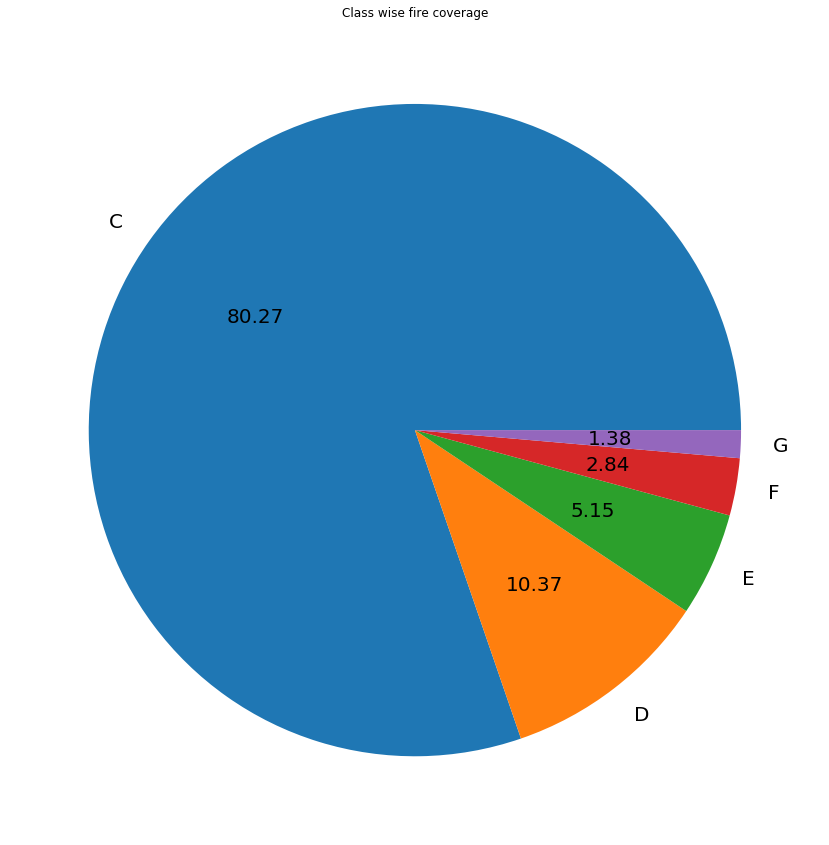

In [14]:
fires_grouped_by_Fireclass.plot(kind = 'pie', \
                                autopct='%1.2f',\
                                    label = '',\
                                    title = ('Class wise fire coverage'), \
                                    figsize = (15, 15),\
                                    fontsize = (20) \
                               );
plt.title.fontsize = 30

find out count of fires for each class, yearwise.
First creating a dataframe with only two columns fire_year and fire_size_class

In [15]:
fires_peryear_byclass = fires.groupby(['FIRE_YEAR', 'FIRE_SIZE_CLASS']).size().reset_index().rename(columns={0:'NUMBER_OF_FIRES'})
fires_peryear_byclass

,FIRE_YEAR,FIRE_SIZE_CLASS,NUMBER_OF_FIRES
0,1992,C,7955
1,1992,D,876
2,1992,E,368
3,1992,F,197
4,1992,G,58
...,...,...,...
115,2015,C,7720
116,2015,D,1098
117,2015,E,568
118,2015,F,336


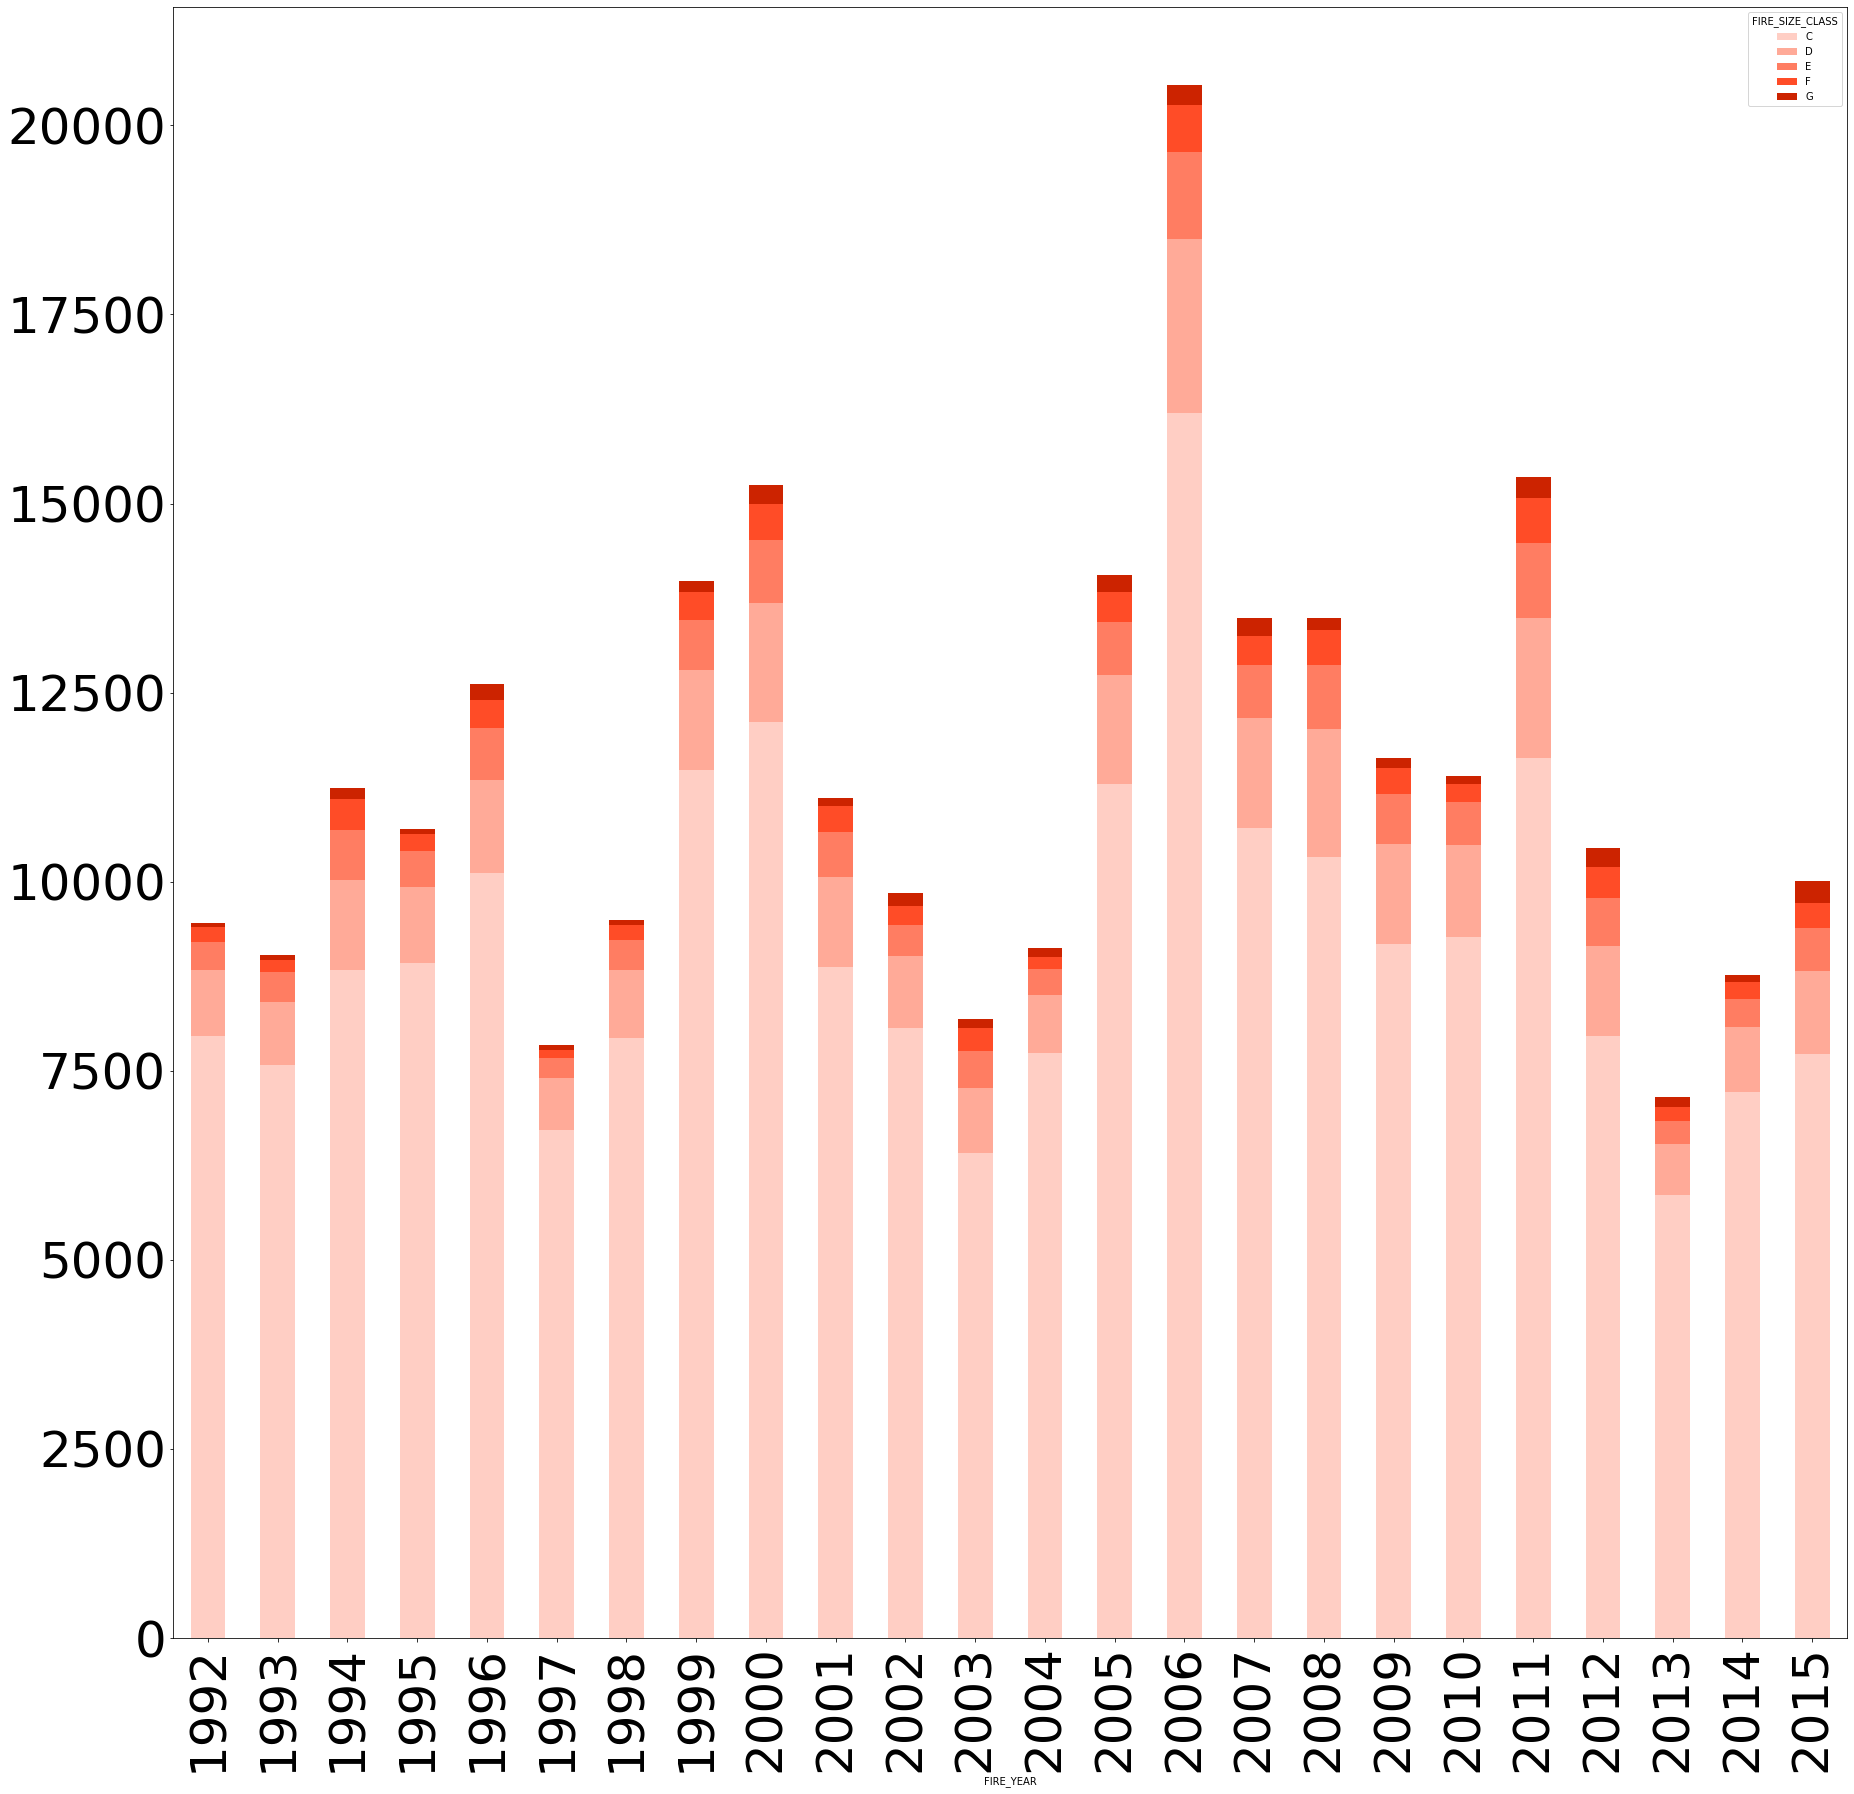

In [16]:
###
pivot_df = fires_peryear_byclass.pivot(index='FIRE_YEAR', columns='FIRE_SIZE_CLASS', values='NUMBER_OF_FIRES')

colors = ["#FFCEC4", "#FFAA98","#FF7D62", "#FF4C27", "#CC2300"]

pivot_df.loc[:,['C','D', 'E', 'F', 'G']].plot.bar(stacked=True, color=colors, figsize=(30,30),fontsize=50);

analysing the large fires.

In [17]:
Gclass = fires_peryear_byclass["FIRE_SIZE_CLASS"].isin(["G"])
fires_peryear_Gclass = fires_peryear_byclass[Gclass].set_index('FIRE_YEAR')
fires_peryear_Gclass

,FIRE_SIZE_CLASS,NUMBER_OF_FIRES
FIRE_YEAR,,
1992,G,58
1993,G,65
1994,G,146
1995,G,69
1996,G,201
1997,G,61
1998,G,76
1999,G,155
2000,G,245


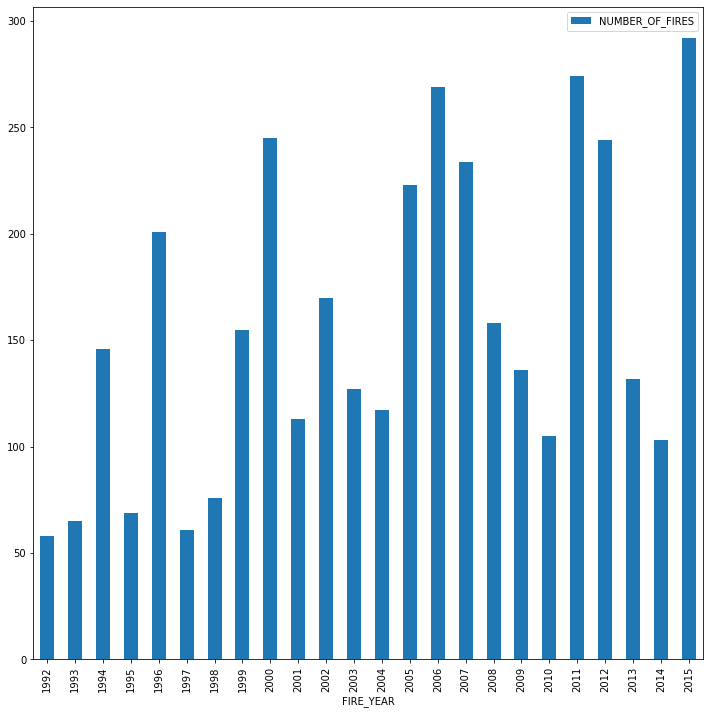

In [18]:
fires_peryear_Gclass.plot(kind = 'bar', figsize = (12,12))

Interpretation:- the occurance of large fires has increased over the period of time.

**Problem 2:** What states are more and less suseptible for wildfire?
we need below columns to analyse this 
FIRE_YEAR
FIRE_SIZE
FIRE_SIZE_CLASS
STATE 

In [19]:
fires_peryear_bystate = fires.groupby(['FIRE_YEAR', 'FIRE_SIZE_CLASS', 'STATE'])\
                            .size().reset_index().rename(columns={0:'NUMBER_OF_FIRES'})
fires_peryear_bystate

,FIRE_YEAR,FIRE_SIZE_CLASS,STATE,NUMBER_OF_FIRES
0,1992,C,AK,40
1,1992,C,AL,22
2,1992,C,AR,32
3,1992,C,AZ,274
4,1992,C,CA,602
...,...,...,...,...
4144,2015,G,OR,20
4145,2015,G,SD,3
4146,2015,G,TX,8
4147,2015,G,WA,23


In [20]:
fires_years_state = fires.groupby(['FIRE_YEAR', 'STATE']).size().reset_index().rename(columns={0:'NUMBER_OF_FIRES'})
fires_years_state

,FIRE_YEAR,STATE,NUMBER_OF_FIRES
0,1992,AK,72
1,1992,AL,25
2,1992,AR,34
3,1992,AZ,347
4,1992,CA,854
...,...,...,...
1143,2015,VT,4
1144,2015,WA,200
1145,2015,WI,43
1146,2015,WV,141


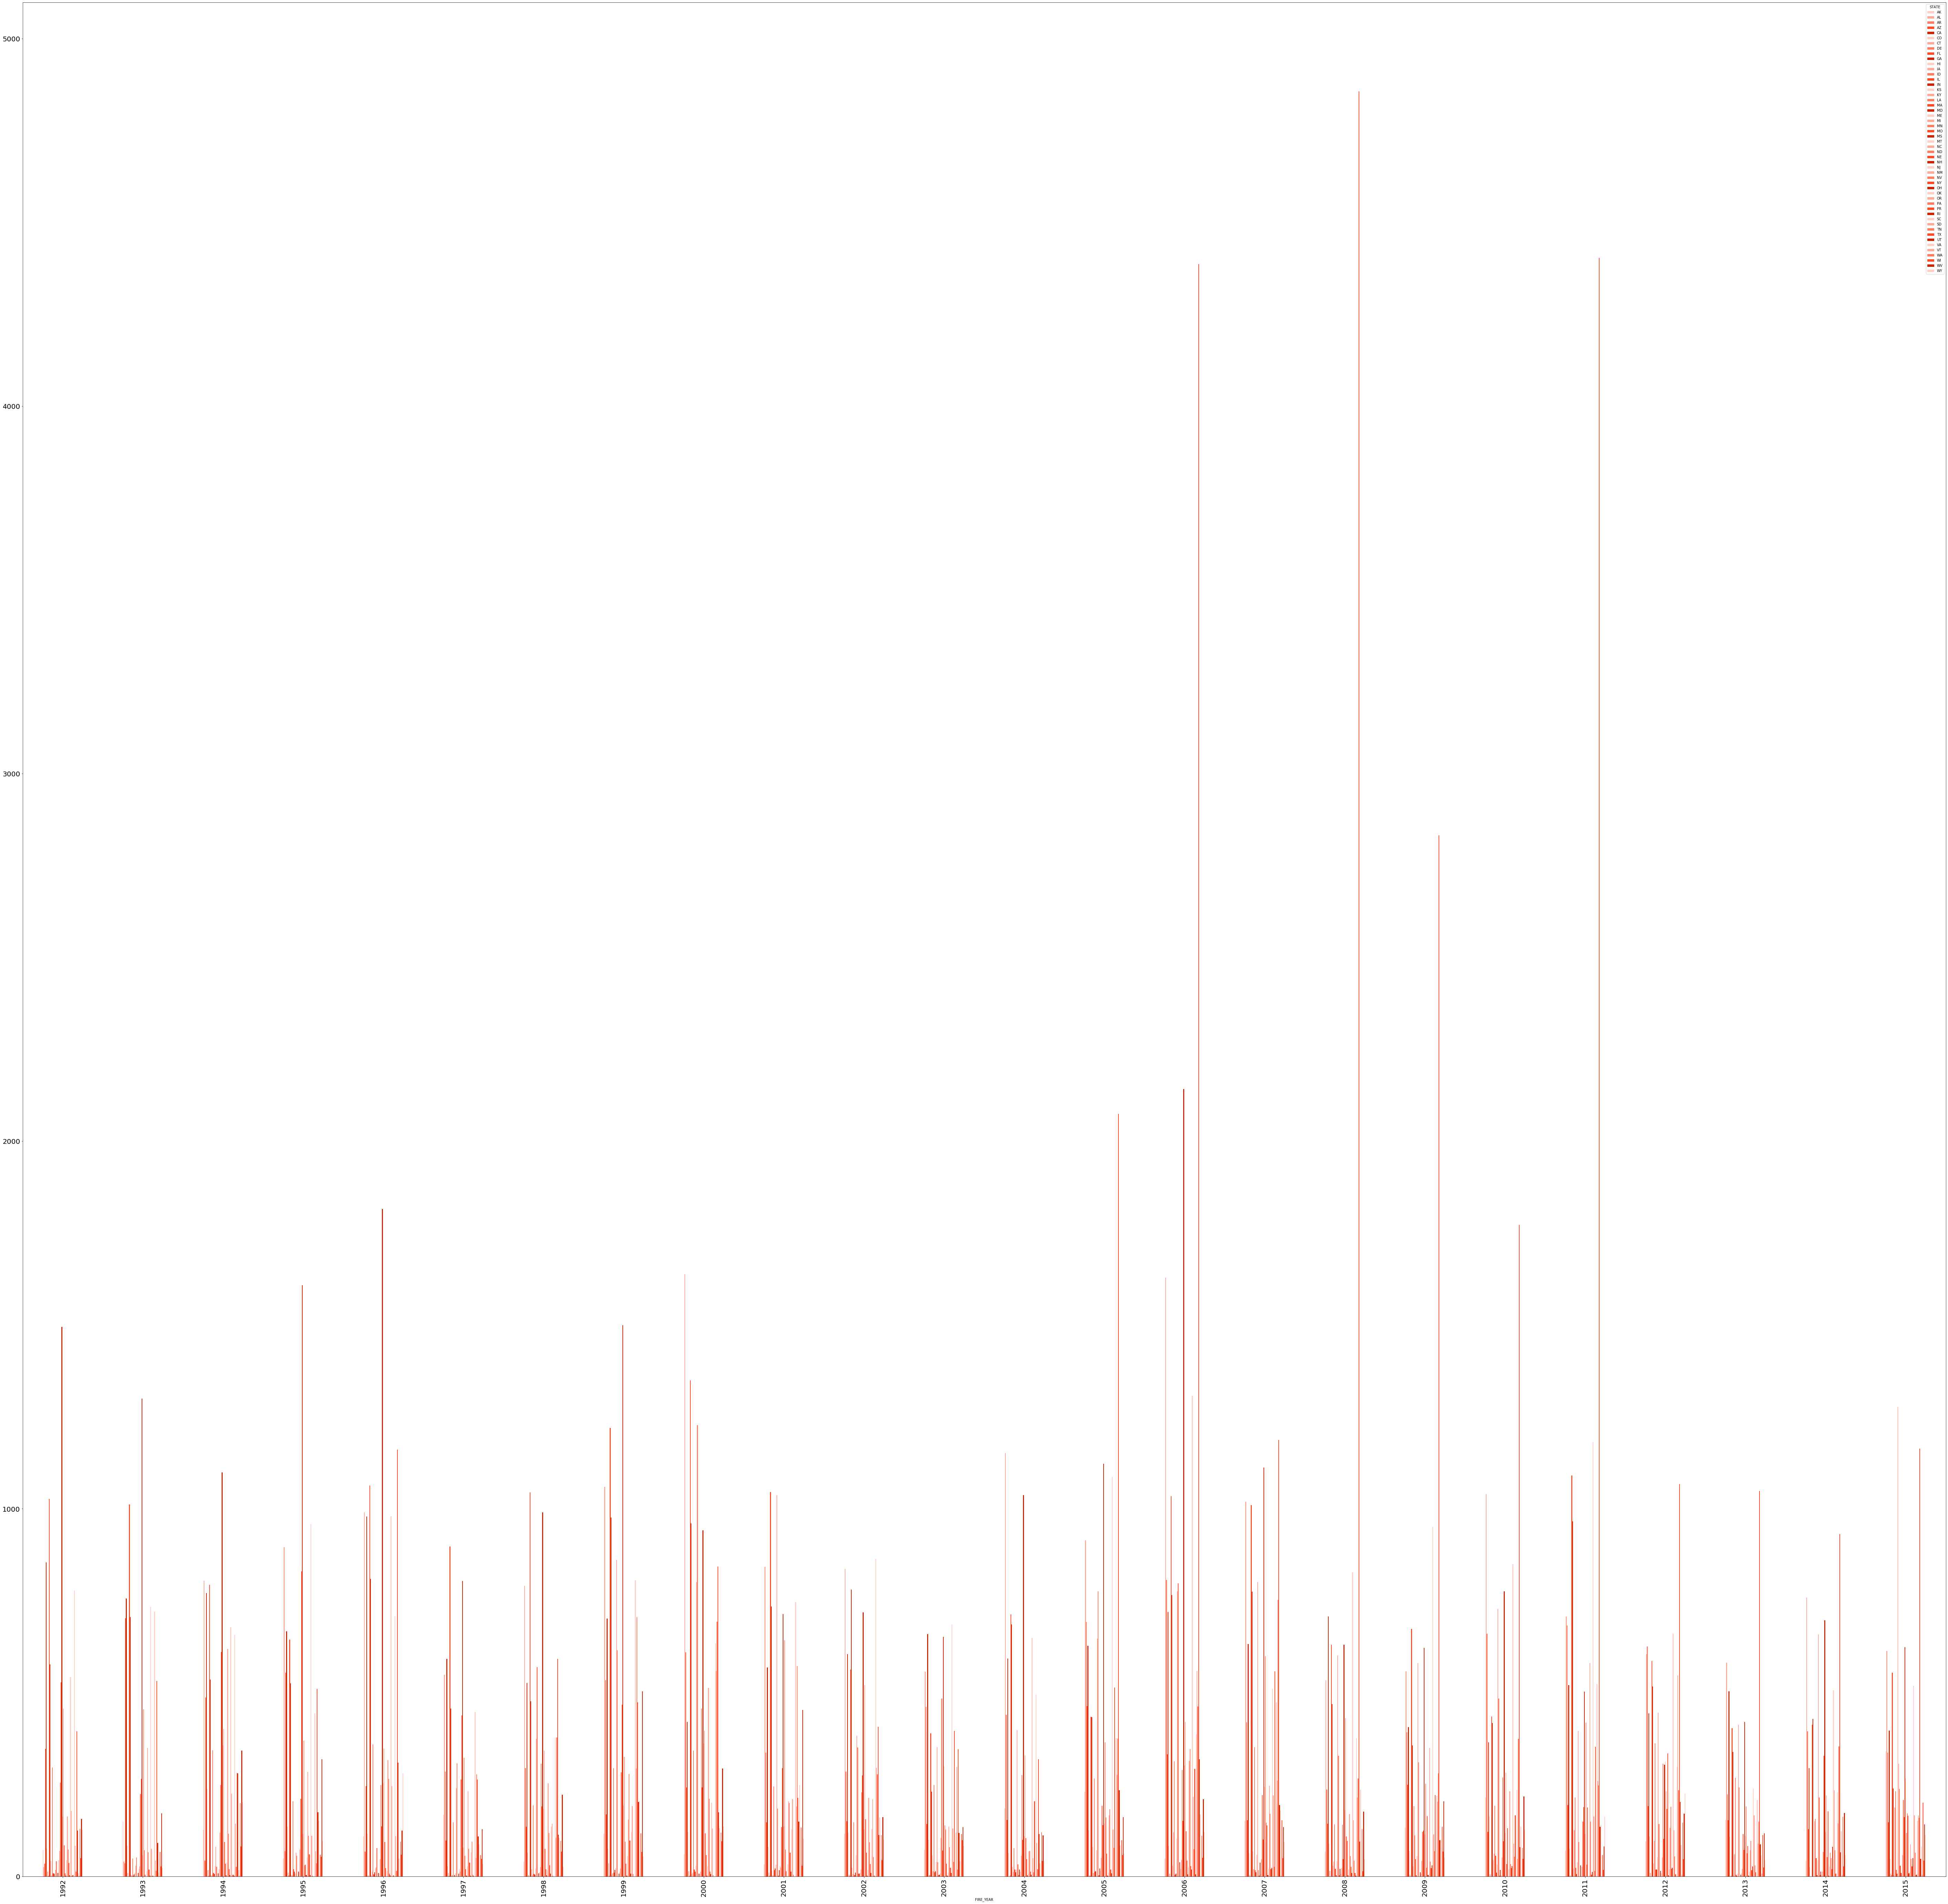

In [21]:
pivot_df = fires_years_state.pivot(index='FIRE_YEAR', columns='STATE', values='NUMBER_OF_FIRES')
pivot_df.plot.bar(color=colors, figsize=(100,100),fontsize=20);
# colors = ["#FFCEC4", "#FFAA98","#FF7D62", "#FF4C27", "#CC2300"]

# pivot_df.loc[:,['C','D', 'E', 'F', 'G']].plot.bar(stacked=True, color=colors, figsize=(30,30),fontsize=50);

This doesnt give any valuable data, so lets see what state has maximum number of fires till now so will groupby state only now

In [22]:
# fires_bystate = fires.groupby(['STATE']).size().reset_index().rename(columns={0:'NUMBER_OF_FIRES'})
# fires_bystate
fires_bystate = fires['STATE'].value_counts().head(25)
fires_bystate

TX    32051
MS    23615
AL    19132
FL    19018
OK    14636
CA    14299
GA    14148
SC    11264
KY    11004
AR     8954
NC     8566
LA     7211
TN     6694
MO     5949
NM     5911
AZ     5840
MN     5691
ID     5546
SD     5090
WV     4899
MT     4456
OR     3762
UT     3622
NV     3106
AK     2835
Name: STATE, dtype: int64

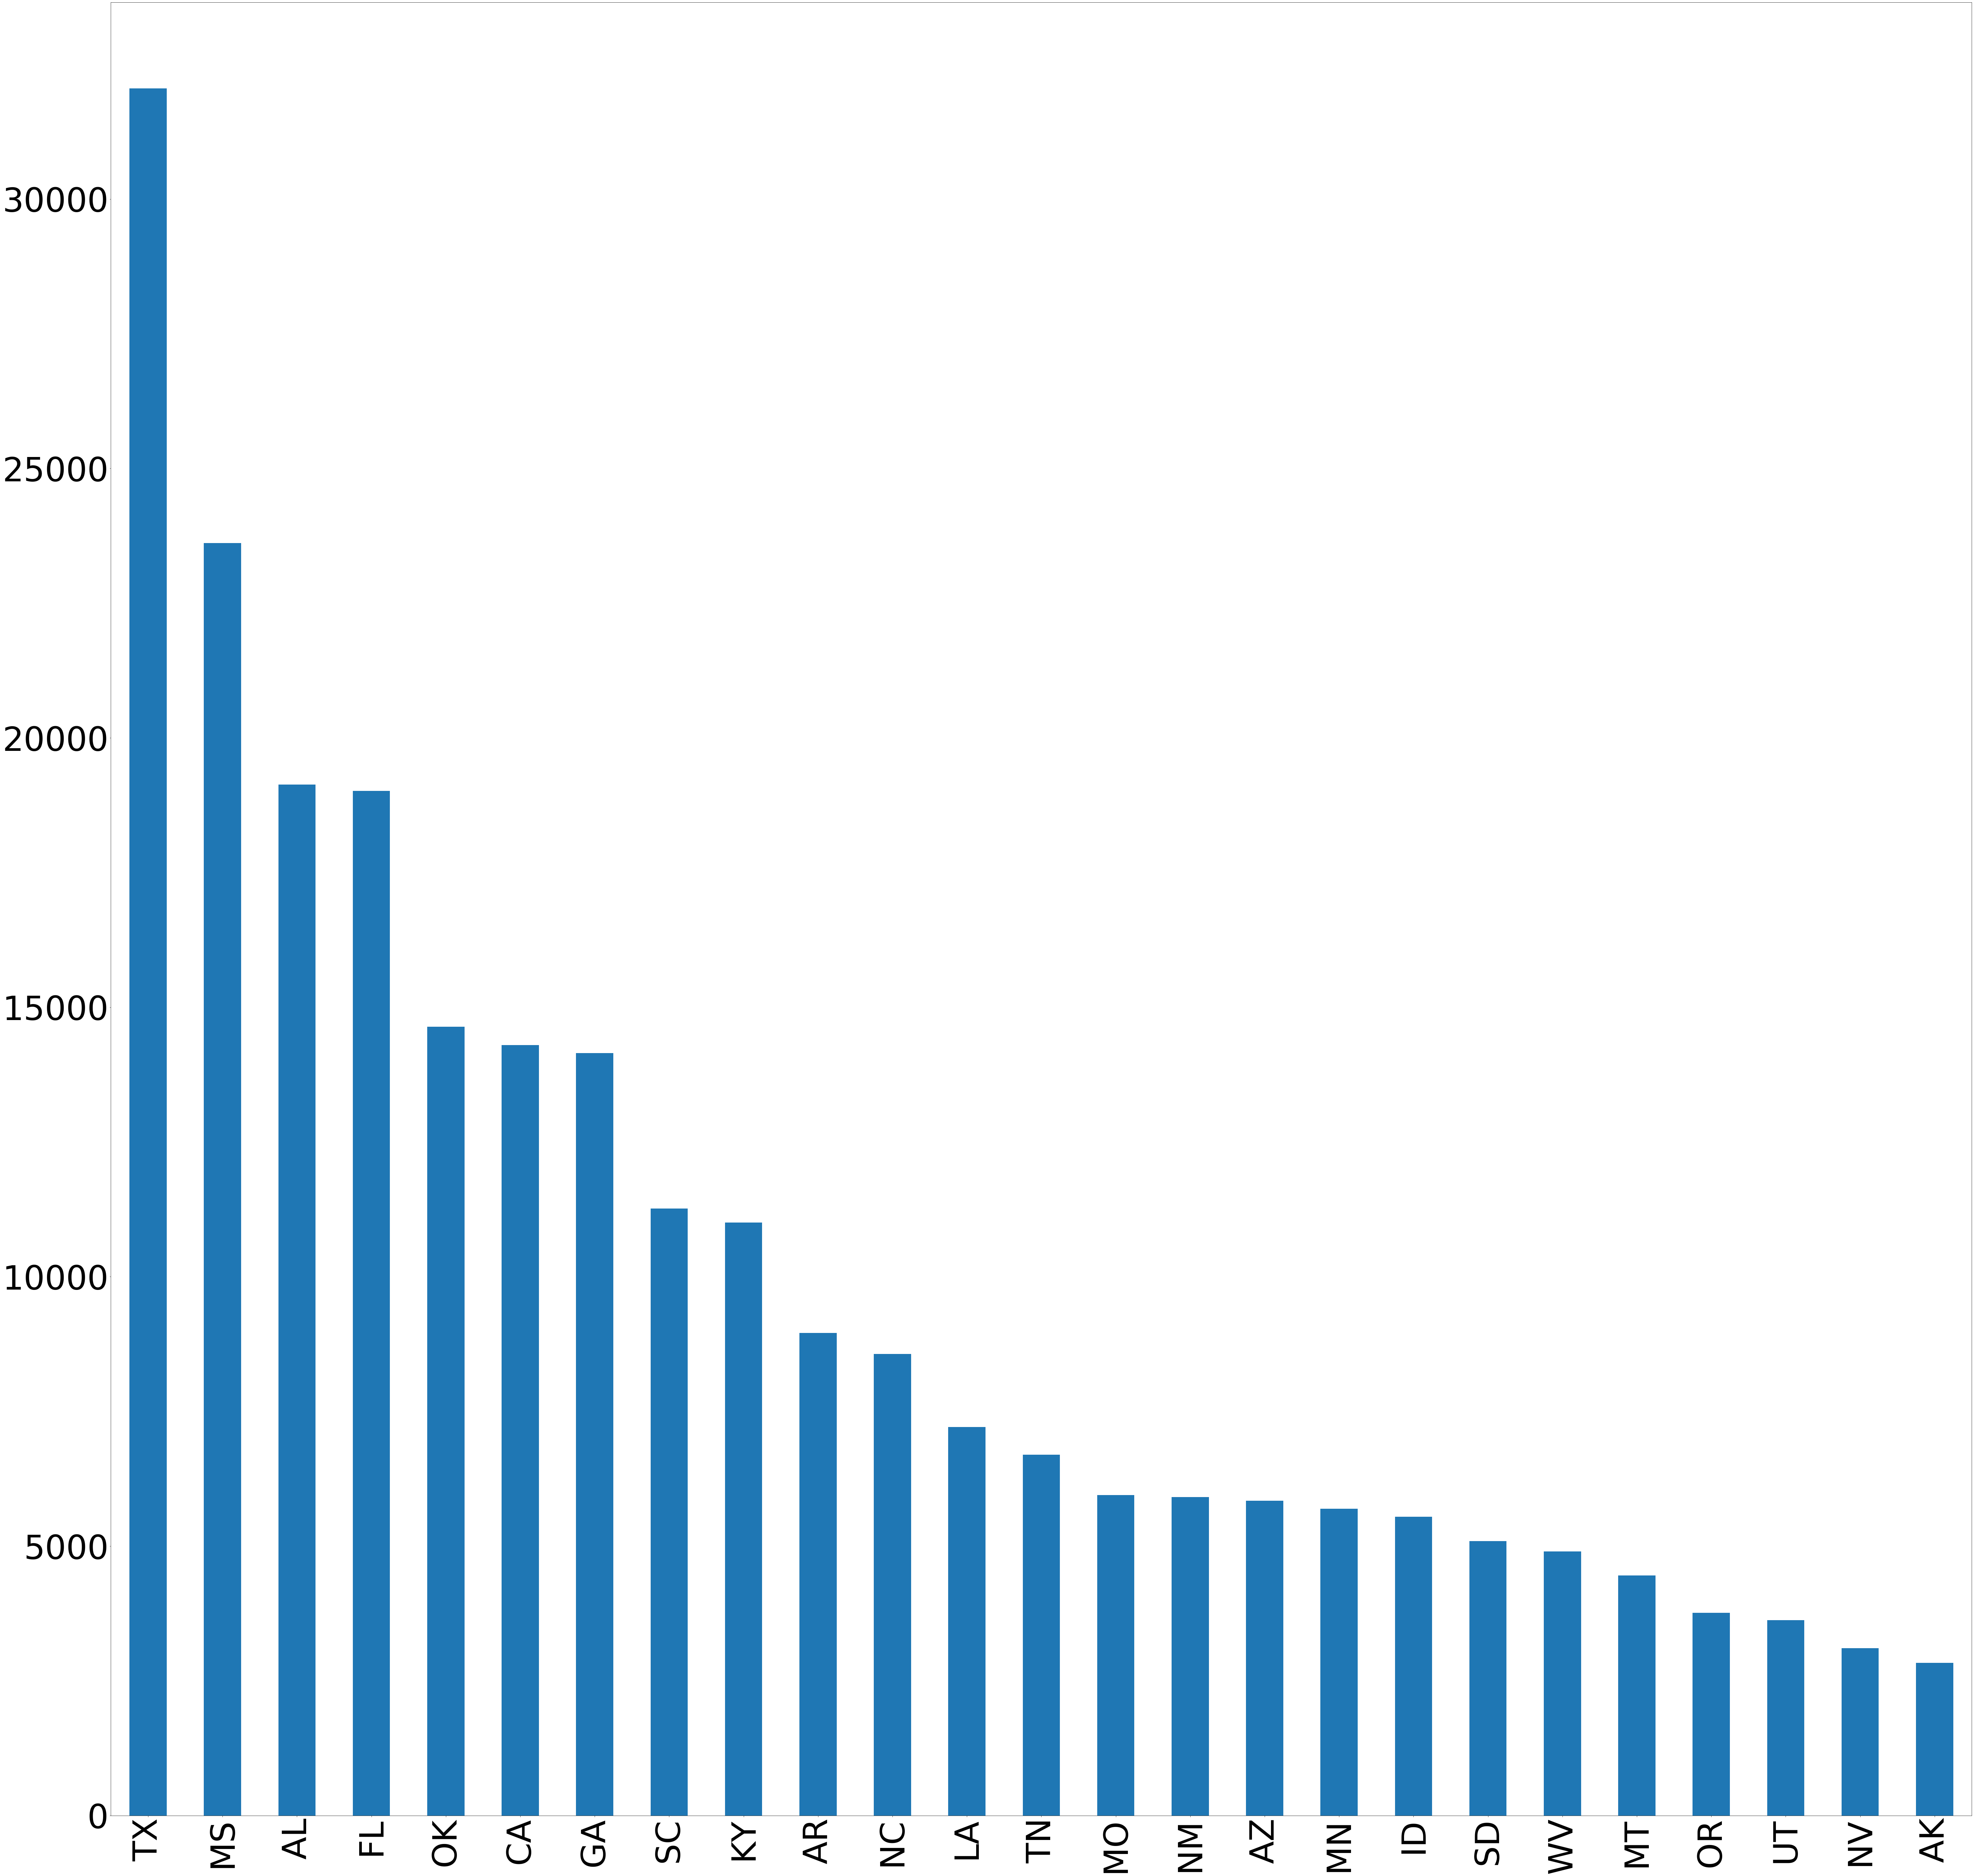

In [23]:
fires_bystate.plot(x = 'STATE', kind = 'bar', figsize=(100,100), fontsize=100)

Interpretation:- TX, MS, AL , FL, OK, CA, GA, SC, KY are more susptible to fire.

analysing the cause of fire we have coulmns STAT_CAUSE_CODE and STAT_CAUSE_DESCR with fire cause information

In [24]:
fires.STAT_CAUSE_CODE.unique()
fires.STAT_CAUSE_DESCR.unique()

array(['Equipment Use', 'Lightning', 'Arson', 'Debris Burning',
       'Miscellaneous', 'Campfire', 'Smoking', 'Railroad', 'Children',
       'Powerline', 'Structure', 'Missing/Undefined', 'Fireworks'],
      dtype=object)

In [25]:
fires_cause = fires['STAT_CAUSE_DESCR'].value_counts()
fires_cause

Arson                65355
Debris Burning       60903
Lightning            40270
Miscellaneous        37274
Missing/Undefined    27074
Equipment Use        21109
Campfire              6013
Railroad              5196
Smoking               4132
Children              2946
Powerline             2564
Fireworks             1090
Structure              244
Name: STAT_CAUSE_DESCR, dtype: int64

ploting a pie chart for top 10 fire causes

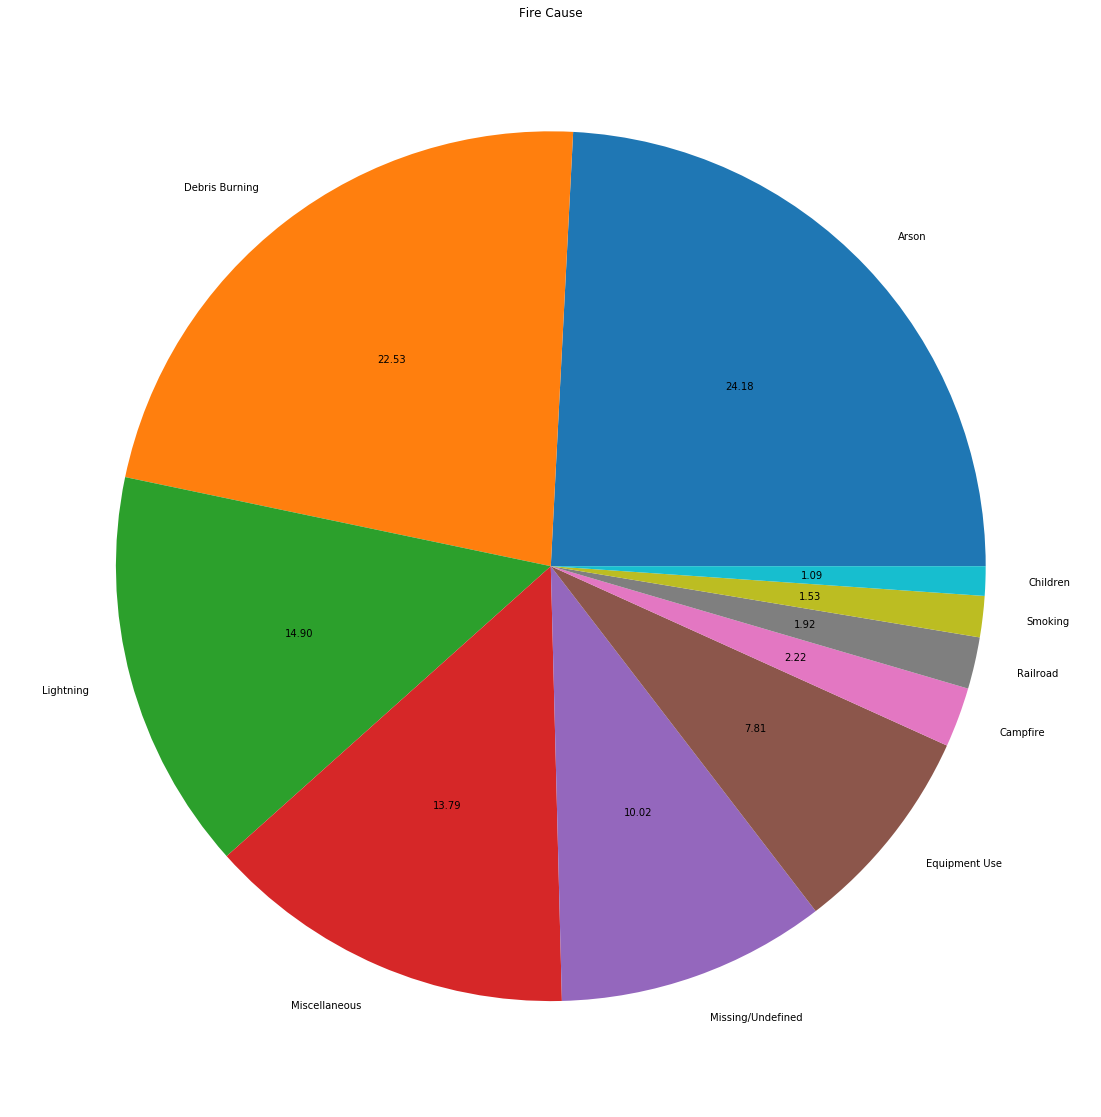

In [26]:
fires_cause.head(10).plot(label ='', title = 'Fire Cause', kind = 'pie', figsize = (25,20), autopct='%1.2f')

Natural causes:- Lightning, structure, railroad, powerline
human created causes:- Fireworks, equipment use, debris burning, children, campfire, arson, smoking.

Lets combine this data 